In [18]:
import csv
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [22]:
max_length = 100
FILENAME = "data/phase/ml_feature_bck2.csv"
STA = "LPAZ"
phase_index = {'P':0, 'S':1, 'T':2, 'N':3}

In [13]:
def phase_read(filename, sta, max_length_phase: {'P':100, 'S':100, 'T':100, 'N':100 }):
    global phase_index
    features = [[], [], [], []]
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        i = -1
        for row in reader:
            i += 1
            if i == 0 or row[1] != sta:
                continue
            ## test with random data:
            # x=[]
            # for y in range(16):
            #    x.append(random.random()*10+(phase_index[row[4]]*10))
            # features[phase_index[row[4]]].append(x)
            
            try:
                x = [float(y) for y in row[8:24]]
            except:
                # print("There is wrong data in line: {}: {}".format(i, row))
                continue
            features[phase_index[row[4]]].append(x)
            
            # features[phase_index[row[4]]].append(row[8:24])

    features_compact_x = []
    features_compact_y = []
    for index in phase_index:
        phase_length = len(features[phase_index[index]])
        if phase_length == 0:
            continue
        indices = np.arange(phase_length)
        random.shuffle(indices)
        f = np.array(features[phase_index[index]])
        i = indices[:max_length_phase[index]]
        features_compact_x.extend(f[i])
        features_compact_y.extend([phase_index[index]]*min(max_length_phase[index], phase_length))

    return features_compact_x, features_compact_y

In [23]:
phase_length = {'P':1200, 'S':1200, 'T':1200, 'N':1200 }
phase_color = {'P':'r', 'S':'g', 'T':'b', 'N':'yellow' }
X, Y = phase_read(FILENAME, STA, phase_length)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4800
[t-SNE] Computed conditional probabilities for sample 2000 / 4800
[t-SNE] Computed conditional probabilities for sample 3000 / 4800
[t-SNE] Computed conditional probabilities for sample 4000 / 4800
[t-SNE] Computed conditional probabilities for sample 4800 / 4800
[t-SNE] Mean sigma: 0.781668
[t-SNE] Iteration 25: error = 1.6916413, gradient norm = 0.0014186
[t-SNE] Iteration 50: error = 1.6904793, gradient norm = 0.0164385
[t-SNE] Iteration 75: error = 1.5160667, gradient norm = 0.0045434
[t-SNE] Iteration 100: error = 1.4781039, gradient norm = 0.0034930
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.478104
[t-SNE] Iteration 125: error = 1.4157671, gradient norm = 0.0023919
[t-SNE] Iteration 150: error = 1.3952618, gradient norm = 0.0021152
[t-SNE] Iteration 175: error = 1.3901434, gradient norm = 0.0020563
[t-SNE] 

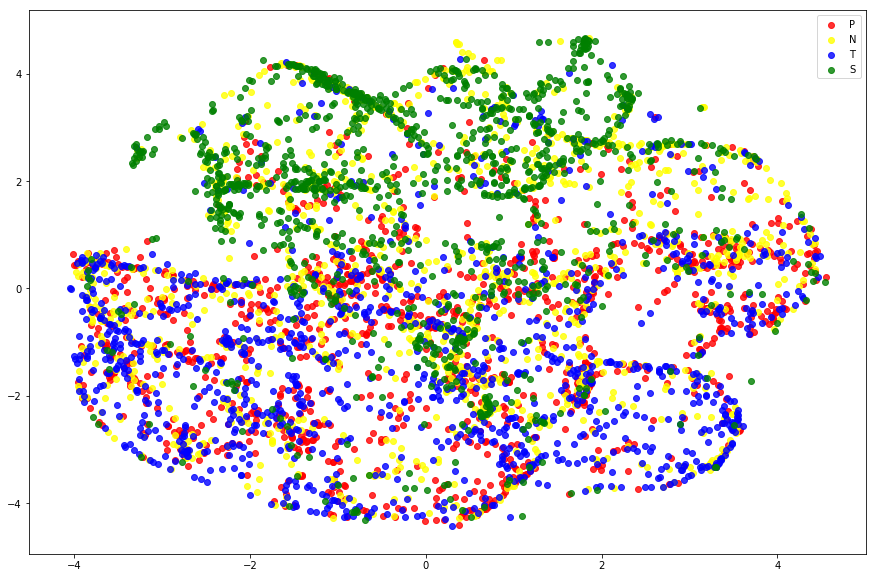

In [24]:
# for p in [1, 5, 10, 20, 30, 40, 50, 70, 100]:
for p in [50]:
    X_tsne = TSNE(learning_rate=200, n_components=3, 
                  perplexity=p, verbose=2, metric='chebyshev').fit_transform(X)
    fig = plt.figure(figsize=(15, 10))
    last_phase_length = 0
    scatter = []
    for index in phase_index:
        print("index:{}, last_phase_length:{}".format(index, last_phase_length))
        s = plt.scatter(X_tsne[last_phase_length:last_phase_length+phase_length[index], 0], 
                    X_tsne[last_phase_length:last_phase_length+phase_length[index], 1], 
        #            X_tsne[last_phase_length:last_phase_length+phase_length[index], 2],
                    alpha=0.8, c=phase_color[index], label=index)
        scatter.append(s)
        last_phase_length += phase_length[index]
    
    plt.legend(handles=scatter)
    plt.show()